# STEP:1 IMPORTING LIBRARIES

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import scipy.stats as stats

# STEP:2 Create the Dataset

In [6]:
np.random.seed(42)
data={
    'product_id':range(1,21),
    'product_name':[f'product{i}'	for	i	in	range(1,21)],
    'category':np.random.choice(['Electronics','Clothing','Home','Sports','Tv','Mobile'],20),
    'units_sold':np.random.poisson(lam=20,size=20),
    'sale_data':pd.date_range(start='2023-01-01',periods=20,freq='D')}
sales_data1=pd.DataFrame(data)
print('Sales_data1:')
print(sales_data1)
    
 

Sales_data1:
    product_id product_name  category  units_sold  sale_data
0            1     product1    Sports          15 2023-01-01
1            2     product2        Tv          20 2023-01-02
2            3     product3      Home          17 2023-01-03
3            4     product4        Tv          14 2023-01-04
4            5     product5        Tv          18 2023-01-05
5            6     product6  Clothing          24 2023-01-06
6            7     product7      Home          20 2023-01-07
7            8     product8      Home          15 2023-01-08
8            9     product9      Home          24 2023-01-09
9           10    product10        Tv          13 2023-01-10
10          11    product11    Sports          19 2023-01-11
11          12    product12      Home          20 2023-01-12
12          13    product13    Mobile          27 2023-01-13
13          14    product14        Tv          22 2023-01-14
14          15    product15  Clothing          20 2023-01-15
15         

In [7]:
sales_data1.to_csv('sales_data1.csv',index=False)

In [8]:
import os
os.getcwd()

'c:\\Users\\SHAIK BASHEER\\Downloads'

# Step:3 DESCRIPTIV STATISTICS

In [10]:
 #	Descriptive	statistics
 descriptive_stats	=	sales_data1['units_sold'].describe()
 #	Display	descriptive	statistics
 print("\nDescriptive	Statistics	for	Units	Sold:")
 print(descriptive_stats)
 #	Additional	statistics
 mean_sales	=	sales_data1['units_sold'].mean()
 median_sales	=	sales_data1['units_sold'].median()
 mode_sales	=	sales_data1['units_sold'].mode()[0]
 variance_sales	=	sales_data1['units_sold'].var()
 std_deviation_sales	=	sales_data1['units_sold'].std()
 #	Display	the	results
 #	Group	by	category	and	calculate	total	and	average	sales
 category_stats	=	sales_data1.groupby('category')['units_sold'].agg(['sum',	'mean',	'std']).reset_index()
 category_stats.columns	=	['Category',	'Total	Units	Sold',	'Average	Units	Sold',	'Std	Dev	of	Units	Sold']
 print("\nStatistical	Analysis:")
 print(f"Mean	Units	Sold:	{mean_sales}")
 print(f"Median	Units	Sold:	{median_sales}")
 print(f"Mode	Units	Sold:	{mode_sales}")
 print(f"Variance	of	Units	Sold:	{variance_sales}")
 print(f"Standard	Deviation	of	Units	Sold:	{std_deviation_sales}")
 print("\nCategory	Statistics:")
 print(category_stats)


Descriptive	Statistics	for	Units	Sold:
count    20.000000
mean     19.650000
std       4.487116
min      13.000000
25%      16.500000
50%      19.500000
75%      22.500000
max      28.000000
Name: units_sold, dtype: float64

Statistical	Analysis:
Mean	Units	Sold:	19.65
Median	Units	Sold:	19.5
Mode	Units	Sold:	20
Variance	of	Units	Sold:	20.13421052631579
Standard	Deviation	of	Units	Sold:	4.4871160589309245

Category	Statistics:
   Category  Total\tUnits\tSold  Average\tUnits\tSold  \
0  Clothing                  62             20.666667   
1      Home                  96             19.200000   
2    Mobile                  70             23.333333   
3    Sports                  78             19.500000   
4        Tv                  87             17.400000   

   Std\tDev\tof\tUnits\tSold  
0                   3.055050  
1                   3.420526  
2                   7.234178  
3                   5.259911  
4                   3.847077  


# STEP 4:INFERENTIAL STATISTICS

# 95 CONFIDENCE	LEVEL

In [13]:
 #	Confidence	Interval	for	the	mean	of	units	sold
confidence_level	=	0.95
degrees_freedom	=	len(sales_data1['units_sold'])	-	1
sample_mean	=	mean_sales
sample_standard_error	=	std_deviation_sales	/	np.sqrt(len(sales_data1['units_sold']))
 #	t-score	for	the	confidence	level
t_score	=	stats.t.ppf((1	+	confidence_level)	/	2,	degrees_freedom)
margin_of_error	=	t_score	*	sample_standard_error
confidence_interval	=	(sample_mean	-	margin_of_error,	sample_mean	+	margin_of_error)
print("\nConfidence	Interval	for	the	Mean	of	Units	Sold:")
print(confidence_interval)



Confidence	Interval	for	the	Mean	of	Units	Sold:
(17.549965041142197, 21.7500349588578)


# 99 CONFIDENCE	LEVEL

In [14]:
#	Confidence	Interval	for	the	mean	of	units	sold
confidence_level	=	0.99
degrees_freedom	=	len(sales_data1['units_sold'])	-	1
sample_mean	=	mean_sales
sample_standard_error	=	std_deviation_sales	/	np.sqrt(len(sales_data1['units_sold']))
#	t-score	for	the	confidence	level
t_score	=	stats.t.ppf((1	+	confidence_level)	/	2,	degrees_freedom)
margin_of_error	=	t_score	*	sample_standard_error
confidence_interval	=	(sample_mean	-	margin_of_error,	sample_mean	+	margin_of_error)
print("\nConfidence	Interval	for	the	Mean	of	Units	Sold:")
print(confidence_interval)


Confidence	Interval	for	the	Mean	of	Units	Sold:
(16.779482255162378, 22.52051774483762)


In [15]:
#	Hypothesis	Testing	(t-test)
 #	Null	hypothesis:	Mean	units	sold	is	equal	to	20
 #	Alternative	hypothesis:	Mean	units	sold	is	not	equal	to	20
t_statistic,p_value	=	stats.ttest_1samp(sales_data1['units_sold'],	20)
print("\nHypothesis	Testing	(t-test):")
print(f"T-statistic:{t_statistic},	P-value: {p_value}")
if	p_value	<0.05:
     print("Reject	the564	null	hypothesis:	The	mean	units	sold	is	significantly	different	from	20.")
else:
     print("Fail	to	reject	the	null	hypothesis:	The	mean	units	sold	is	not	significantly	different	from	20.")


Hypothesis	Testing	(t-test):
T-statistic:-0.348831535376597,	P-value: 0.7310516409781928
Fail	to	reject	the	null	hypothesis:	The	mean	units	sold	is	not	significantly	different	from	20.


C:\Users\SHAIK BASHEER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


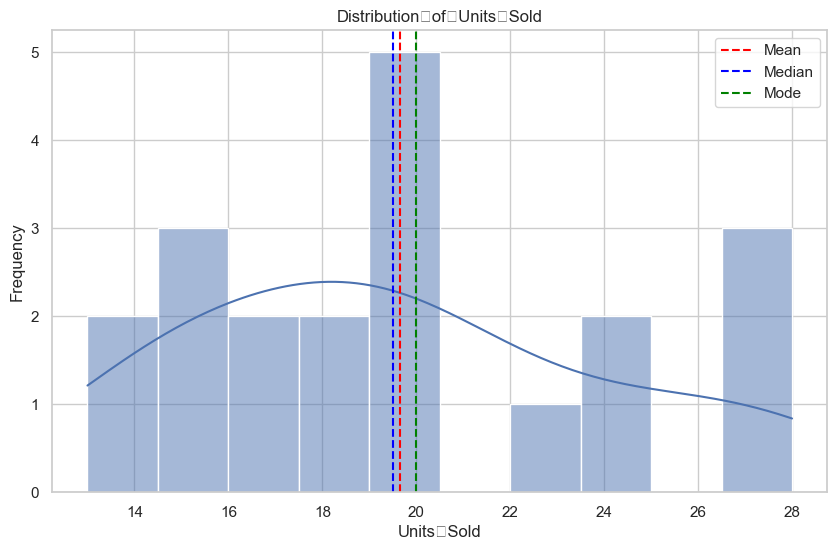

C:\Users\SHAIK BASHEER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


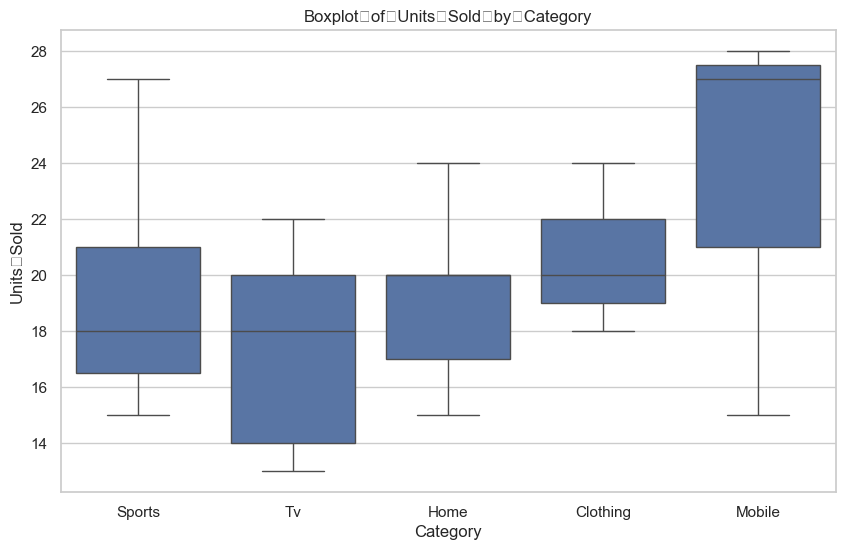

C:\Users\SHAIK BASHEER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


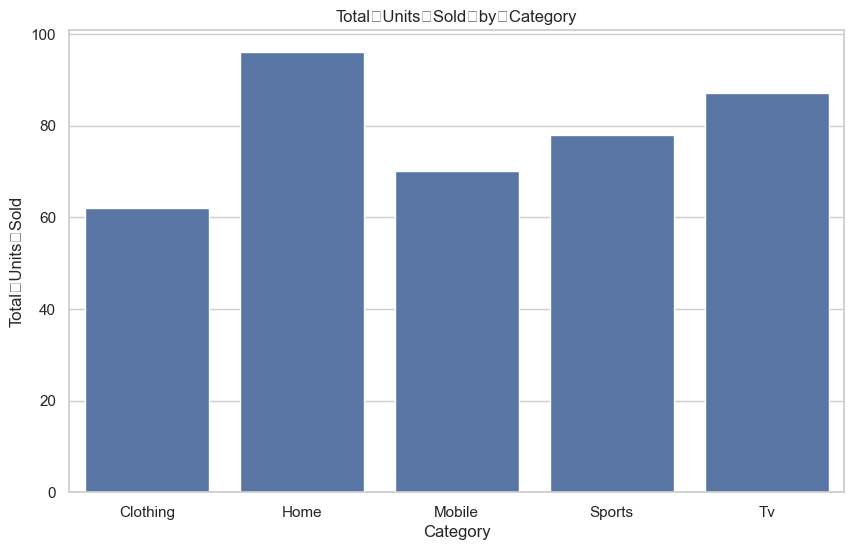

In [16]:
#	Visualizations
sns.set(style="whitegrid")
#	Plot	distribution	of	units	sold
plt.figure(figsize=(10,	6))
sns.histplot(sales_data1['units_sold'],	bins=10,	kde=True)
plt.title('Distribution	of	Units	Sold')
plt.xlabel('Units	Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales,	color='red',	linestyle='--',	label='Mean')
plt.axvline(median_sales,	color='blue',	linestyle='--',	label='Median')
plt.axvline(mode_sales,	color='green',	linestyle='--',	label='Mode')
plt.legend()
plt.show()
# Boxplot	for	units	sold	by	category
plt.figure(figsize=(10,	6))
sns.boxplot(x='category',	y='units_sold',	data=sales_data1)
plt.title('Boxplot	of	Units	Sold	by	Category')
plt.xlabel('Category')
plt.ylabel('Units	Sold')
plt.show()
#   Bar	plot for total	units	sold	by	category
plt.figure(figsize=(10,	6))
sns.barplot(x='Category',	y='Total	Units	Sold',	data=category_stats)
plt.title('Total	Units	Sold	by	Category')
plt.xlabel('Category')
plt.ylabel('Total	Units	Sold')
plt.show()

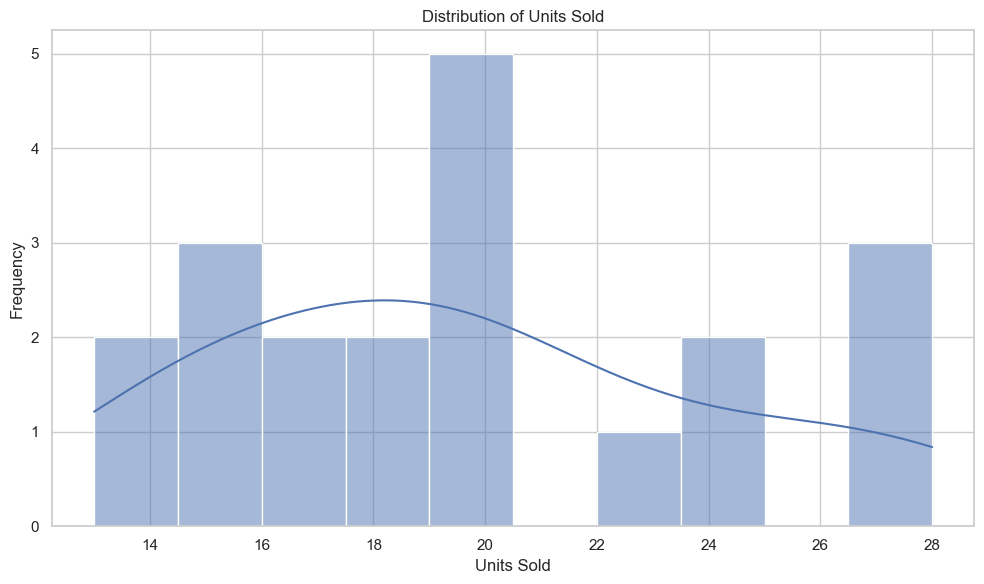

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_data1['units_sold'], bins=10, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


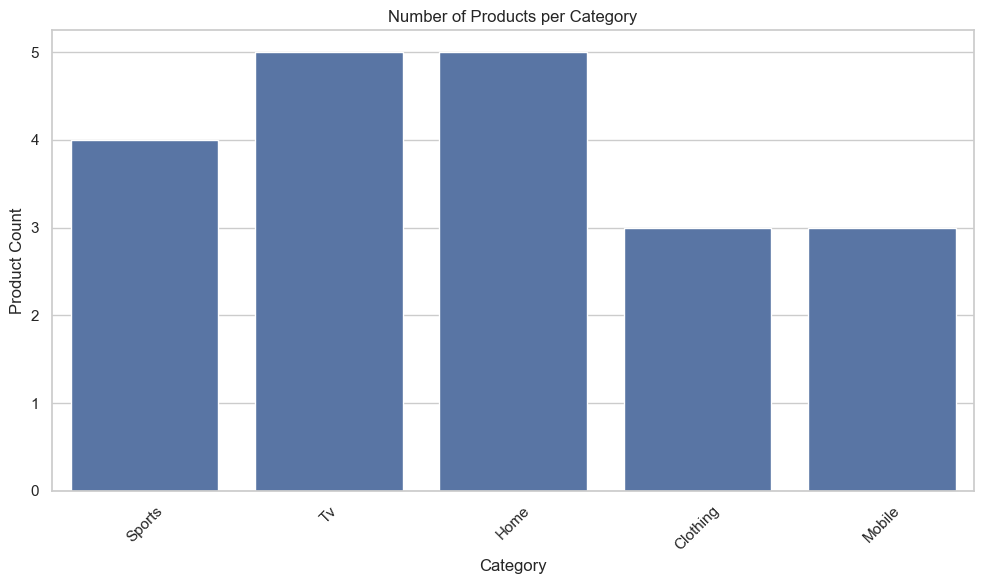

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_data1, x='category')
plt.title('Number of Products per Category')
plt.xlabel('Category')
plt.ylabel('Product Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


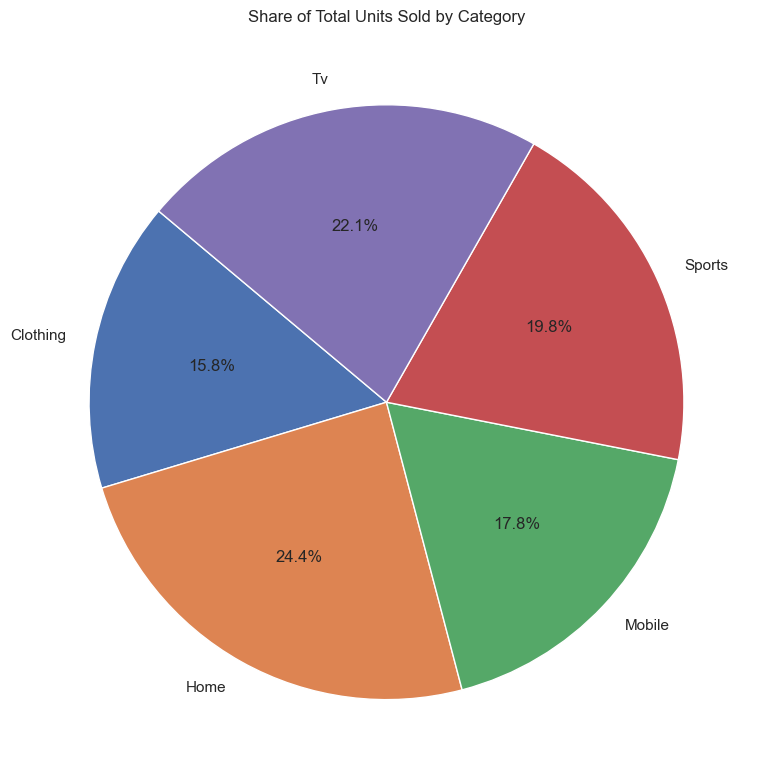

In [21]:
category_pie = sales_data1.groupby('category')['units_sold'].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_pie, labels=category_pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Total Units Sold by Category')
plt.tight_layout()
plt.show()


In [24]:
print(sales_data1.columns)


Index(['product_id', 'product_name', 'category', 'units_sold', 'sale_data'], dtype='object')


In [25]:
sales_data1.rename(columns={'sale_data': 'sale_date'}, inplace=True)


In [26]:
sales_data1['sale_date'] = pd.to_datetime(sales_data1['sale_date'])


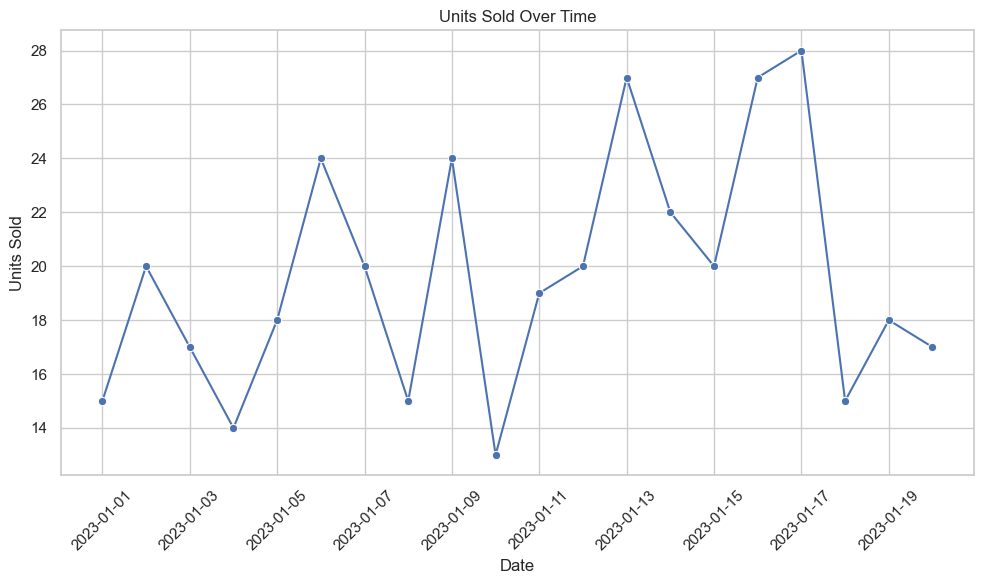

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=sales_data1.sort_values('sale_date'),
    x='sale_date',
    y='units_sold',
    marker='o'
)
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
sales_data1.to_csv("retail_sales.csv", index=False)


In [30]:
import os
os.getcwd()


'c:\\Users\\SHAIK BASHEER\\Downloads'